# Numerical integration with Python

**Author:** Simon Mutch  
**Date:** 2017-08-02  

---

In this notebook we'll very briefly cover how to do simple numerical integration of a function with Python.

I'm going to assume that you have some basic knowledge of Python, but don't worry if you don't.  This notebook is very simple and will act as a basic introduction in itself.  For a proper introduction to Python, the [Software Carpentry course](http://swcarpentry.github.io/python-novice-inflammation/) is a decent place to start.  

There are a few prerequisite packages that we'll need for doing our simple numerical integration:

* [Numpy](http://www.numpy.org) - "the fundamental package for scientific computing with Python"
* [Scipy](https://scipy.org/scipylib/index.html) - "many user-friendly and efficient numerical routines such as routines for numerical integration and optimization"
* [matplotlib](http://matplotlib.org) - "Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments"

Many Python environments will have these pre-installed.  If you get errors when trying to import them below, then the chances are they aren't installed in your current Python environment.  If this is the case, please see the installation instructions for each package by following the links above or, alternatively, consider trying the excellent [Anaconda distribution](https://www.continuum.io/what-is-anaconda) (recommended).

For reference, here are the versions of the relevant packages used to create this notebook:

> numpy 1.12.1  
> scipy 0.19.0  
> matplotlib 2.0.2  

The first thing we need to do is import our packages...

In [1]:
# unfortunately the Windows machines in this lab only have Python v2 (not v3)
# and so there are a couple of things we need to do to get everything to run smoothly...
from __future__ import print_function, division

# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# set a few options that will make the plots generated in this notebook look better
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches': 'tight'}
plt.rcParams['figure.dpi'] = 100

## Setting up the problem

Let's take a contrived example where we can easily calculate an analytic solution to check the validity of our result.

Let's consider the area under a $\sin$ wave between $\theta=0$ and $\pi$.

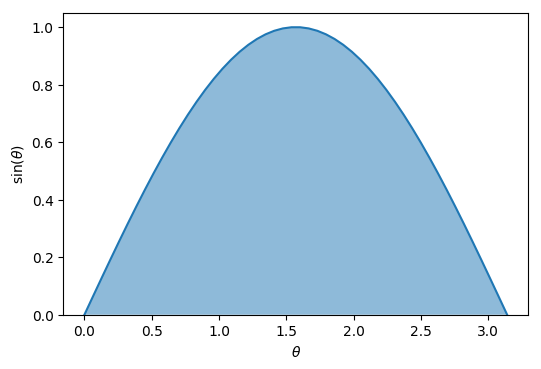

In [2]:
theta = np.linspace(0, np.pi, 50)
y = np.sin(theta)

fig, ax = plt.subplots()
ax.plot(theta, y)
ax.fill_between(theta, y, alpha=0.5)
ax.set(xlabel=r'$\theta$', ylabel=r'$\sin(\theta)$', ylim=(0, 1.05));

## Doing the integral

To numerically integrate this, we first define the function that we want to integrate.  In this case it's rather simple, however, in practice this could be an arbitrarily complex function.

In [3]:
def f(theta):
    return np.sin(theta)

Next we can use the [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html) module to do a simple numerical integration of this function.  Note that we imported this module as `integrate` above.

In [4]:
numerical_result = integrate.quad(f, 0, np.pi)
print(numerical_result)

(2.0, 2.220446049250313e-14)


The first number here is the result, whilst the second number is an estimate of the absolute error.  Let's throw away the latter.

In [5]:
numerical_result = numerical_result[0]

## Checking the result

Lastly, lets compare this with the analytic solution.

In [6]:
analytic_result = -np.cos(np.pi) + np.cos(0)
print("The analytic result is {:.2f}".format(analytic_result))
print("Identical to numerical result within available precision? ", np.isclose(analytic_result, numerical_result))

The analytic result is 2.00
Identical to numerical result within available precision?  True


Here we used the `scipy.integrate.quad` function to do a simple integration over a single variable.  However, if you have a look at the documentation for the [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html) module you'll see that there are also functions available for double integrals, triple integrals and integrals over multiple variables.  There are functions for approximating integrals from fixed sampled points too!

#### Added bonus

Check out the [ODE solver](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) in `scipy.integrate`.  To get a feel for how it works, try to implement a solver for a simple pendulum.